In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ML-Project-new/
!git clone https://github.com/tehret/blind-denoising

/content/drive/MyDrive/ML-Project-new
fatal: destination path 'blind-denoising' already exists and is not an empty directory.


In [7]:
%cd /content/drive/MyDrive/ML-Project-new/blind-denoising
!git clone https://github.com/SaoYan/DnCNN-PyTorch

/content/drive/MyDrive/ML-Project-new/blind-denoising
Cloning into 'DnCNN-PyTorch'...
remote: Enumerating objects: 583, done.
remote: Total 583 (delta 0), reused 0 (delta 0), pack-reused 583
Receiving objects: 100% (583/583), 31.67 MiB | 11.75 MiB/s, done.
Resolving deltas: 100% (47/47), done.
Checking out files: 100% (491/491), done.


In [17]:
!chmod 755 -R /content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/tvl1flow
%cd /content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/
!pwd
import glob
print(glob.glob("/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/*"))

/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow
/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow
['/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/CMakeLists.txt', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/Makefile', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/README.txt', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/bicubic_interpolation.c', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/iio.c', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/iio.h', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/license.txt', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/main.c', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/mask.c', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/trycompilers.sh', '/content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/tvl1flow.sh', '/content/drive/MyDriv

In [24]:
#%%shell
#cd /content/drive/MyDrive/ML-Project-new/blind-denoising/tvl1flow/
#./tvl1flow /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0001.png /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0002.png
#sh tvl1flow.sh /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/000%03d.png 1 10 /content/drive/MyDrive/ML-Project-new/blind-denoising/optflow-video/000%03d.flo 

/bin/bash: line 1: ./tvl1flow: cannot execute binary file: Exec format error


CalledProcessError: ignored

Convert input images to gray

In [8]:
import glob,cv2,os
noisy_input_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy"
original_input_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original"
noisy_gray_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy_gray"
original_gray_dir = "/content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original_gray"
if not os.path.exists(noisy_gray_dir):
  os.makedirs(noisy_gray_dir)
if not os.path.exists(original_gray_dir):
  os.makedirs(original_gray_dir)
for img in glob.glob(noisy_input_dir+"/*"):
  img_name = img.split("/")[-1]
  #print(img_name)
  gray_img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  cv2.imwrite(noisy_gray_dir+"/"+img_name,gray_img)

for img in glob.glob(original_input_dir+"/*"):
  img_name = img.split("/")[-1]
  gray_img = cv2.imread(img,cv2.IMREAD_GRAYSCALE)
  cv2.imwrite(original_gray_dir+"/"+img_name,gray_img)

In [9]:
%cd /content/drive/MyDrive/ML-Project-new/blind-denoising
import sys
if '/content/drive/MyDrive/ML-Project-new/blind-denoising' not in sys.path:
  sys.path.append('/content/drive/MyDrive/ML-Project-new/blind-denoising'); #To add this path to module search path
!python blind_denoising_raghu.py --input /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0%03d.png \
--ref /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png \
--flow /content/drive/MyDrive/ML-Project-new/blind-denoising/flow_out_noisy/0%03d.flo \
--output /content/drive/MyDrive/ML-Project-new/blind-denoising/output_noflow_noisy/0%03d.png \
--output_psnr /content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_noflow_noisy.txt \
--enable_flow 0 \
--first 92 \
--last 150

!python blind_denoising_raghu.py --input /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0%03d.png \
--ref /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png \
--flow /content/drive/MyDrive/ML-Project-new/blind-denoising/flow_out_noisy/0%03d.flo \
--output /content/drive/MyDrive/ML-Project-new/blind-denoising/output_flow_noisy/0%03d.png \
--output_psnr /content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_flow_noisy.txt \
--enable_flow 1 \
--first 92 \
--last 150

/content/drive/MyDrive/ML-Project-new/blind-denoising

### Model-blind Video Denoising Via Frame-to-frame Training ###
> Parameters:
	input: /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/noisy/0%03d.png
	ref: /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png
	flow: /content/drive/MyDrive/ML-Project-new/blind-denoising/flow_out_noisy/0%03d.flo
	output: /content/drive/MyDrive/ML-Project-new/blind-denoising/output_noflow_noisy/0%03d.png
	output_psnr: /content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_noflow_noisy.txt
	output_network: final.pth
	first: 92
	last: 150
	iter: 20
	network: dncnn/logs/DnCNN-S-25/net.pth
	enable_flow: 0


Loading model a pre-trained DnCNN

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
93
27.573881517996806
94
27.56783

In [11]:
%cd /content/drive/MyDrive/ML-Project-new/blind-denoising
import sys
if '/content/drive/MyDrive/ML-Project-new/blind-denoising' not in sys.path:
  sys.path.append('/content/drive/MyDrive/ML-Project-new/blind-denoising');
!python blind_denoising_raghu.py --input /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png \
--ref /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png \
--flow /content/drive/MyDrive/ML-Project-new/blind-denoising/flow_out/0%03d.flo \
--output /content/drive/MyDrive/ML-Project-new/blind-denoising/output_noflow_original/0%03d.png \
--output_psnr /content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_noflow_original.txt \
--enable_flow 0 \
--first 92 \
--last 150

!python blind_denoising_raghu.py --input /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png \
--ref /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png \
--flow /content/drive/MyDrive/ML-Project-new/blind-denoising/flow_out/0%03d.flo \
--output /content/drive/MyDrive/ML-Project-new/blind-denoising/output_flow_original/0%03d.png \
--output_psnr /content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_flow_original.txt \
--enable_flow 1 \
--first 92 \
--last 150

/content/drive/MyDrive/ML-Project-new/blind-denoising

### Model-blind Video Denoising Via Frame-to-frame Training ###
> Parameters:
	input: /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png
	ref: /content/drive/MyDrive/ML-Project-new/noise2noise/datasets/Dynamic_scenes/data/original/0%03d.png
	flow: /content/drive/MyDrive/ML-Project-new/blind-denoising/flow_out/0%03d.flo
	output: /content/drive/MyDrive/ML-Project-new/blind-denoising/output_noflow_original/0%03d.png
	output_psnr: /content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_noflow_original.txt
	output_network: final.pth
	first: 92
	last: 150
	iter: 20
	network: dncnn/logs/DnCNN-S-25/net.pth
	enable_flow: 0


Loading model a pre-trained DnCNN

/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
93
23.31618580693775
94
23.671

Plotting PSNR

In [12]:
psnr_noisy_flow = "/content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_flow_noisy.txt"
psnr_noisy_noflow = "/content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_noflow_noisy.txt"
psnr_orig_flow = "/content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_flow_original.txt"
psnr_orig_noflow = "/content/drive/MyDrive/ML-Project-new/blind-denoising/plot_psnr_noflow_original.txt"

with open(psnr_noisy_flow) as f:
  lines = f.readlines();
  psnrval_noisy_flow = []
  for line in lines:
    psnrval_noisy_flow.append(float(line.strip()))

with open(psnr_noisy_noflow) as f:
  lines = f.readlines();
  psnrval_noisy_noflow = []
  for line in lines:
    psnrval_noisy_noflow.append(float(line.strip()))

with open(psnr_orig_flow) as f:
  lines = f.readlines();
  psnrval_orig_flow = []
  for line in lines:
    psnrval_orig_flow.append(float(line.strip()))

with open(psnr_orig_noflow) as f:
  lines = f.readlines();
  psnrval_orig_noflow = []
  for line in lines:
    psnrval_orig_noflow.append(float(line.strip()))

print(len(psnrval_orig_noflow))

58


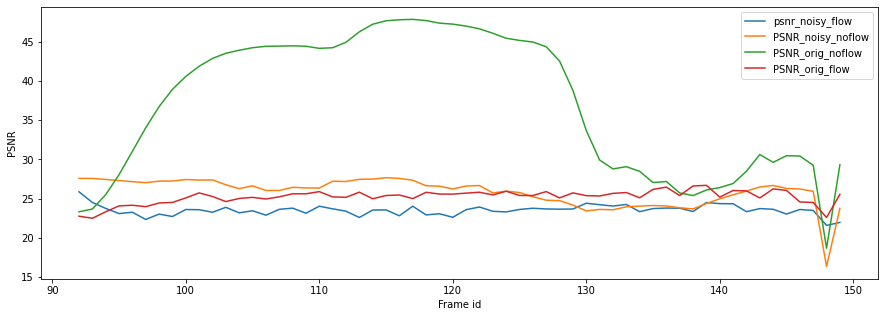

In [13]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,5))
plt.plot(range(92,150),psnrval_noisy_flow)
plt.plot(range(92,150),psnrval_noisy_noflow)
plt.plot(range(92,150),psnrval_orig_noflow)
plt.plot(range(92,150),psnrval_orig_flow)
plt.xlabel("Frame id")
plt.ylabel("PSNR")
plt.legend(['psnr_noisy_flow','PSNR_noisy_noflow','PSNR_orig_noflow','PSNR_orig_flow'], loc='upper right')